In [ ]:
#Importer les bibliothèques de base pour l'analyse
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use("ggplot")  #using style ggplot
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
import datetime as dt
import plotly.graph_objects as go
import plotly.express as px

In [ ]:
#Importer le jeu de données
df =pd.read_csv("/content/public_transportation_data.csv")

# regardez l'ensemble de données
df.head()

,Unnamed: 0,insert_date,origin,destination,start_date,end_date,train_type,price,train_class,fare
0,0,2019-04-19 05:31:43,MADRID,SEVILLA,2019-05-29 06:20:00,2019-05-29 09:16:00,AV City,38.55,Turista,Promo
1,1,2019-04-19 05:31:43,MADRID,SEVILLA,2019-05-29 07:00:00,2019-05-29 09:32:00,AVE,53.40,Turista,Promo
2,2,2019-04-19 05:31:43,MADRID,SEVILLA,2019-05-29 07:30:00,2019-05-29 09:51:00,AVE,47.30,Turista,Promo
3,3,2019-04-19 05:31:43,MADRID,SEVILLA,2019-05-29 08:00:00,2019-05-29 10:32:00,AVE,69.40,Preferente,Promo
4,4,2019-04-19 05:31:43,MADRID,SEVILLA,2019-05-29 08:30:00,2019-05-29 11:14:00,ALVIA,NaN,Turista,Promo


In [ ]:
# Regarder la forme du jeu de données
df.shape

(2579771, 10)

In [ ]:
#Vérification des types de données de toutes les colonnes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2579771 entries, 0 to 2579770
Data columns (total 10 columns):
 #   Column       Dtype  
---  ------       -----  
 0   Unnamed: 0   int64  
 1   insert_date  object 
 2   origin       object 
 3   destination  object 
 4   start_date   object 
 5   end_date     object 
 6   train_type   object 
 7   price        float64
 8   train_class  object 
 9   fare         object 
dtypes: float64(1), int64(1), object(8)
memory usage: 196.8+ MB


In [ ]:
#Conversion du type de données de la colonne - date de l'objet vers Datetime
df["insert_date"]=pd.to_datetime(df["insert_date"])

In [ ]:
# Statitistique descriptive
df["price"].describe().round(2)

,price
count,2269090.00
mean,63.39
std,25.78
min,15.45
25%,43.75
50%,60.30
75%,78.80
max,214.20


In [ ]:
#Vérifier les valeurs nulles
df.isna().sum()

,0
Unnamed: 0,0
insert_date,0
origin,0
destination,0
start_date,0
end_date,0
train_type,0
price,310681
train_class,9664
fare,9664


In [ ]:
# Remplir la colonne price en fonction de la colonne origin
avg=df.groupby(["origin"])["price"].mean()
avg

,price
origin,
BARCELONA,84.671718
MADRID,64.071365
PONFERRADA,42.004859
SEVILLA,62.470221
VALENCIA,39.852544


In [ ]:
# Remplir les valeurs NaN dans la colonne price
df['price'] = df.groupby('origin')['price'].transform(lambda x: x.fillna(x.mean()))

In [ ]:
# Supprimer les valeurs NaN dans les colonnes "train class" et "fare"
df.dropna(inplace=True)

In [ ]:
#Vérification des valeurs nulles - à nouveau
df.isna().sum()

,0
Unnamed: 0,0
insert_date,0
origin,0
destination,0
start_date,0
end_date,0
train_type,0
price,0
train_class,0
fare,0


In [ ]:
#Regarder la forme du jeu de données après le traitement des valeurs manquantes
df.shape

(2570107, 10)

In [ ]:
#Ajouter la colonne "Day"
df["Day"]=df["insert_date"].dt.day_name()

In [ ]:
# Définir une fonction pour calculer la durée du trajet
df = df.reset_index()
datetimeFormat = '%Y-%m-%d %H:%M:%S'
def fun(a,b):
    diff = dt.datetime.strptime(b, datetimeFormat)- dt.datetime.strptime(a, datetimeFormat)
    return(diff.seconds/3600.0)

In [ ]:
# Ajouter la colonne "trip duration"
df["Trip duration"] = df.apply(lambda x:fun(x['start_date'],x['end_date']),axis=1)

In [ ]:
#Ajouter les colonnes "day", "month" et "year"
df["Month"]=df["insert_date"].dt.month
df["day"]=df["insert_date"].dt.day
df["year"]=df["insert_date"].dt.year

In [ ]:
# Afficher les données
df.head()

,index,Unnamed: 0,insert_date,origin,destination,start_date,end_date,train_type,price,train_class,fare,Day,Trip duration,Month,day,year
0,0,0,2019-04-19 05:31:43,MADRID,SEVILLA,2019-05-29 06:20:00,2019-05-29 09:16:00,AV City,38.550000,Turista,Promo,Friday,2.933333,4,19,2019
1,1,1,2019-04-19 05:31:43,MADRID,SEVILLA,2019-05-29 07:00:00,2019-05-29 09:32:00,AVE,53.400000,Turista,Promo,Friday,2.533333,4,19,2019
2,2,2,2019-04-19 05:31:43,MADRID,SEVILLA,2019-05-29 07:30:00,2019-05-29 09:51:00,AVE,47.300000,Turista,Promo,Friday,2.350000,4,19,2019
3,3,3,2019-04-19 05:31:43,MADRID,SEVILLA,2019-05-29 08:00:00,2019-05-29 10:32:00,AVE,69.400000,Preferente,Promo,Friday,2.533333,4,19,2019
4,4,4,2019-04-19 05:31:43,MADRID,SEVILLA,2019-05-29 08:30:00,2019-05-29 11:14:00,ALVIA,64.071365,Turista,Promo,Friday,2.733333,4,19,2019


In [ ]:
df["year"].unique()

array([2019], dtype=int32)

In [ ]:
df["Month"].unique()

array([4, 5], dtype=int32)

In [ ]:
df["day"].unique()

array([19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30,  1,  2,  3,  4,  5,
        6,  7,  8,  9, 14, 11, 12, 13, 15, 16, 17, 18], dtype=int32)

In [ ]:
#Calculer le nombre de jours
num_day=df["insert_date"].dt.date.value_counts()
num_day=pd.DataFrame(num_day)
num_day.shape

(29, 1)

<function matplotlib.pyplot.show(close=None, block=None)>

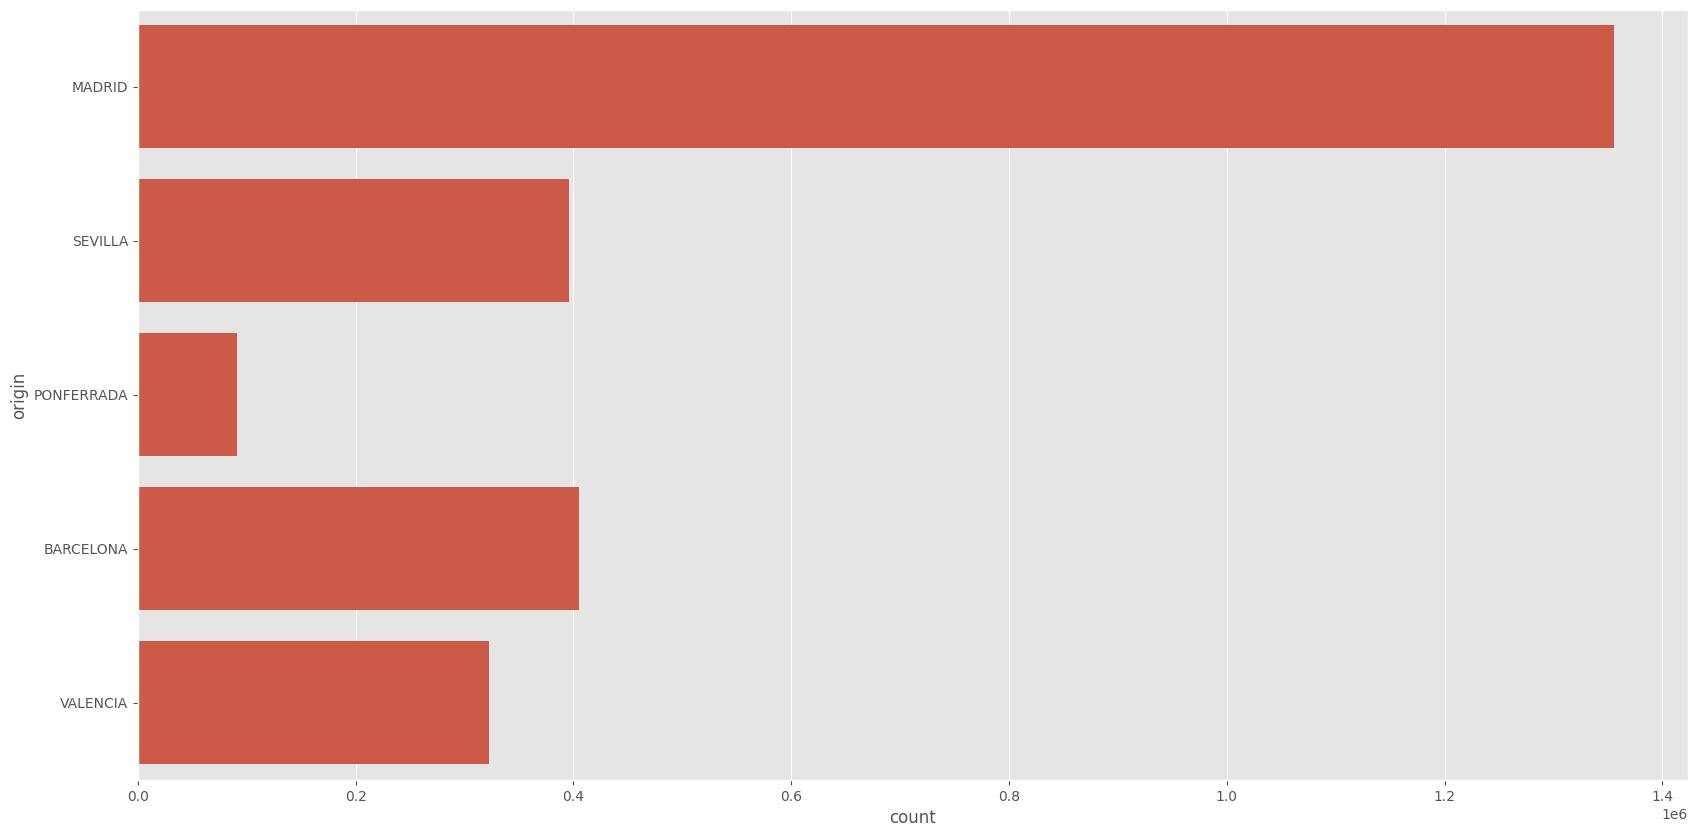

In [ ]:
# Les personnes commencent leur voyage depuis ces stations.
plt.figure(figsize=(20,10))
sns.countplot(df['origin'])
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

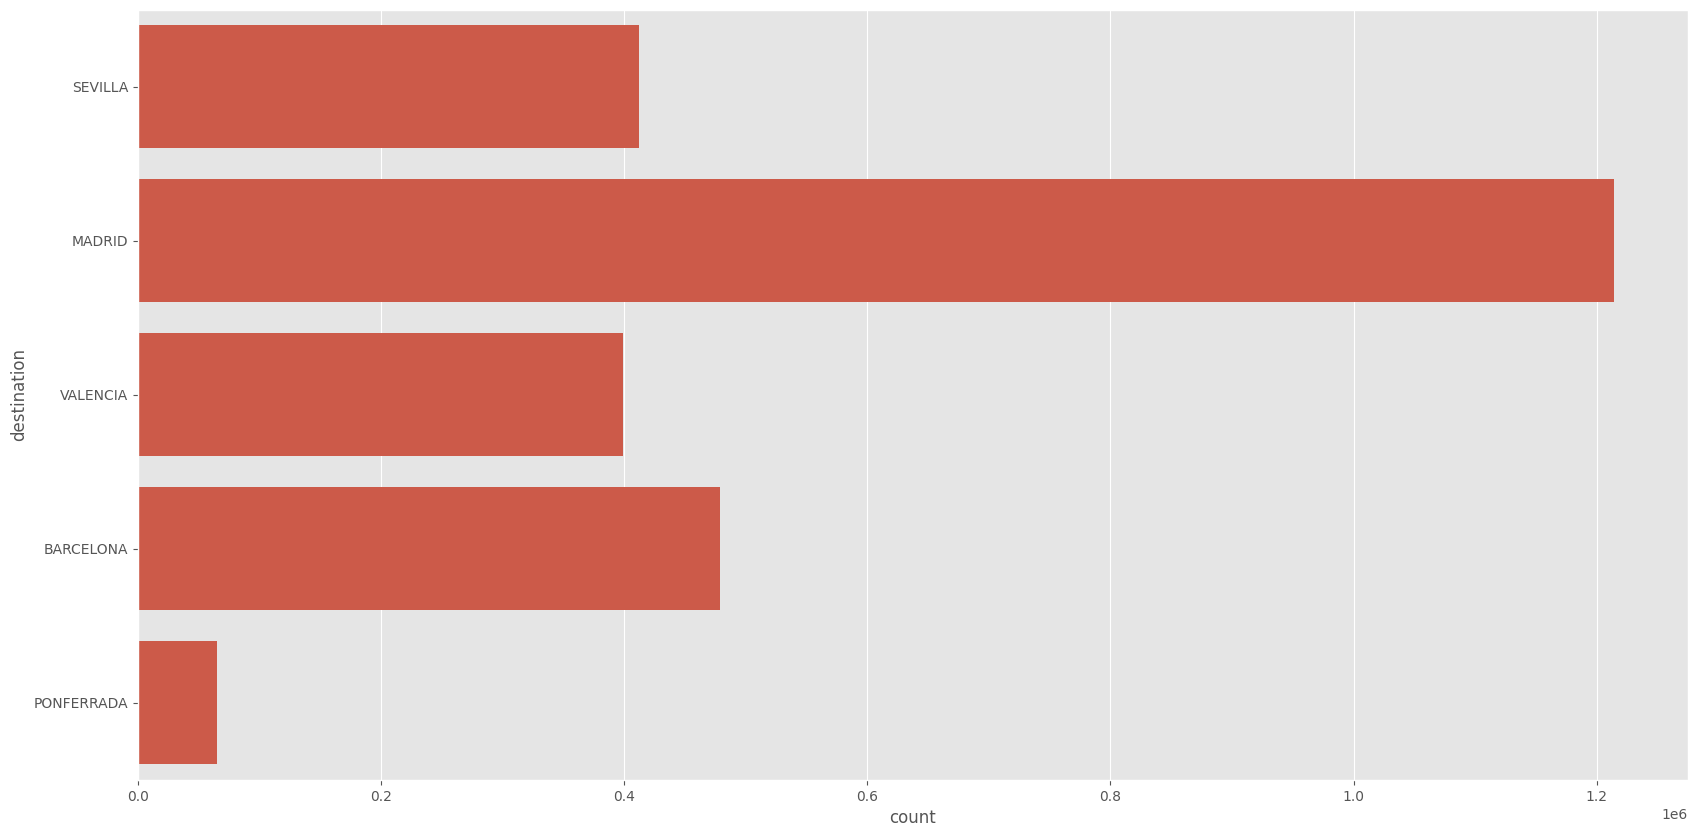

In [ ]:
# Les personnes terminent leur voyage à ces stations.
plt.figure(figsize=(20,10))
sns.countplot(df['destination'])
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

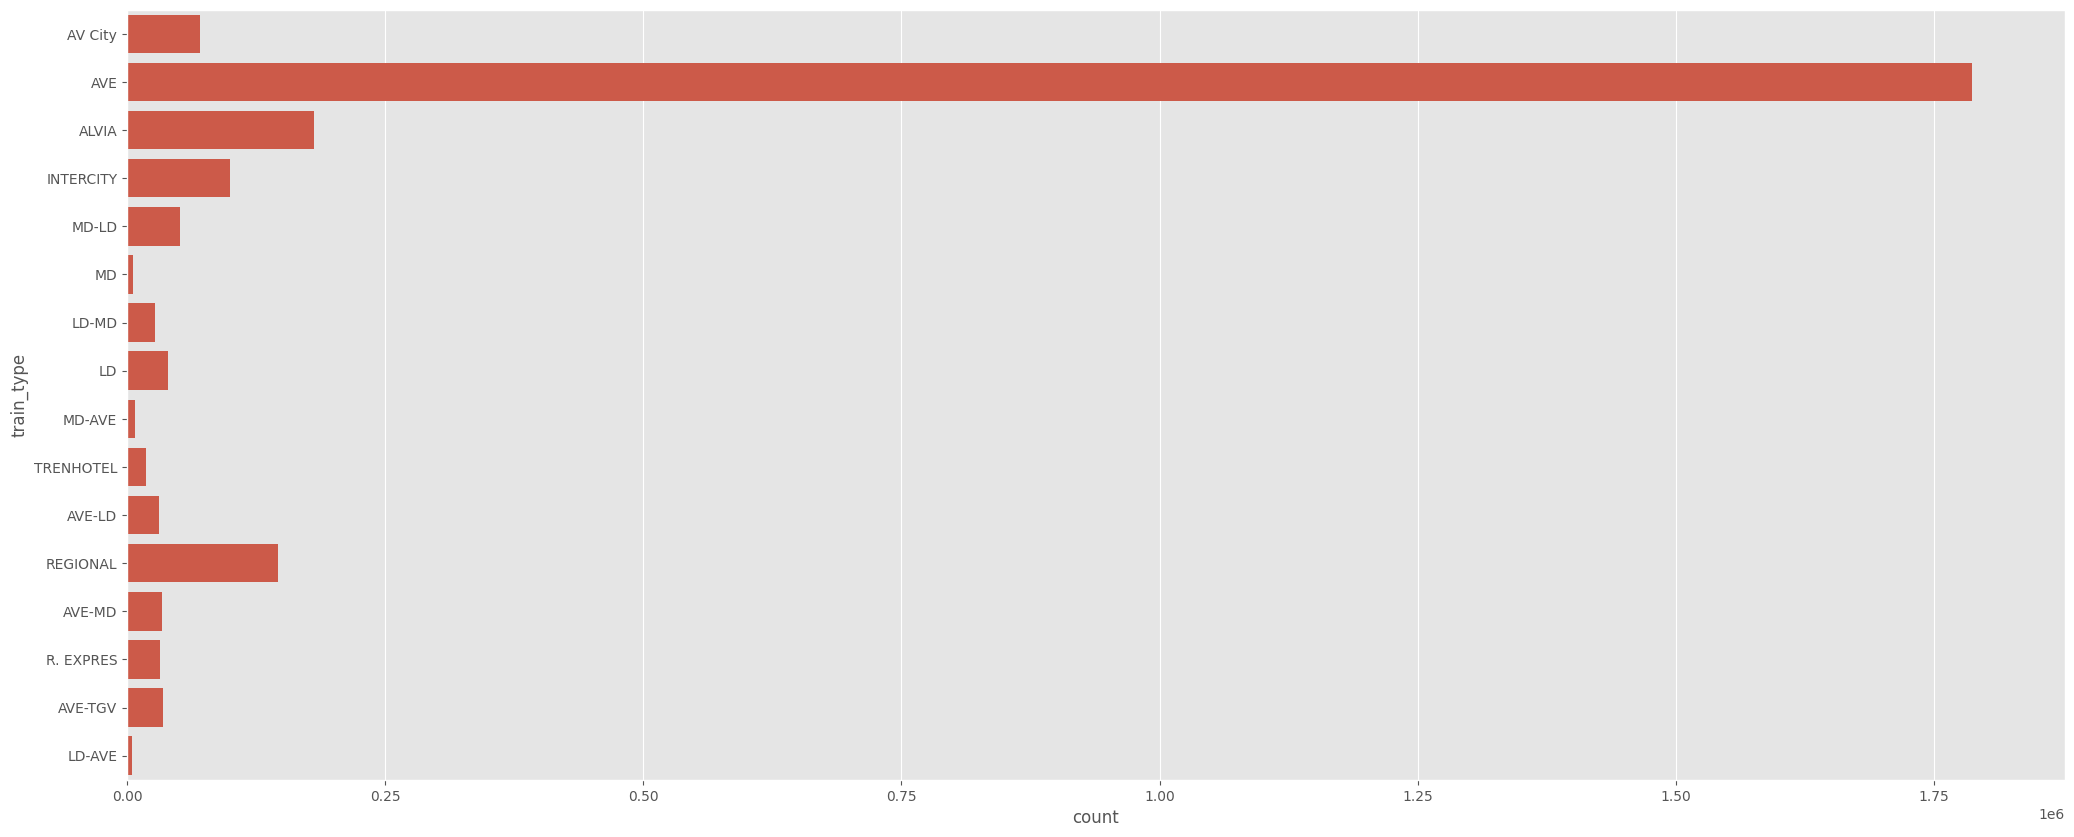

In [ ]:
# Le type de train le plus populaire / le plus utilisé
plt.figure(figsize=(25,10))
sns.countplot(df['train_type'])
plt.show

<Axes: xlabel='train_type', ylabel='price'>

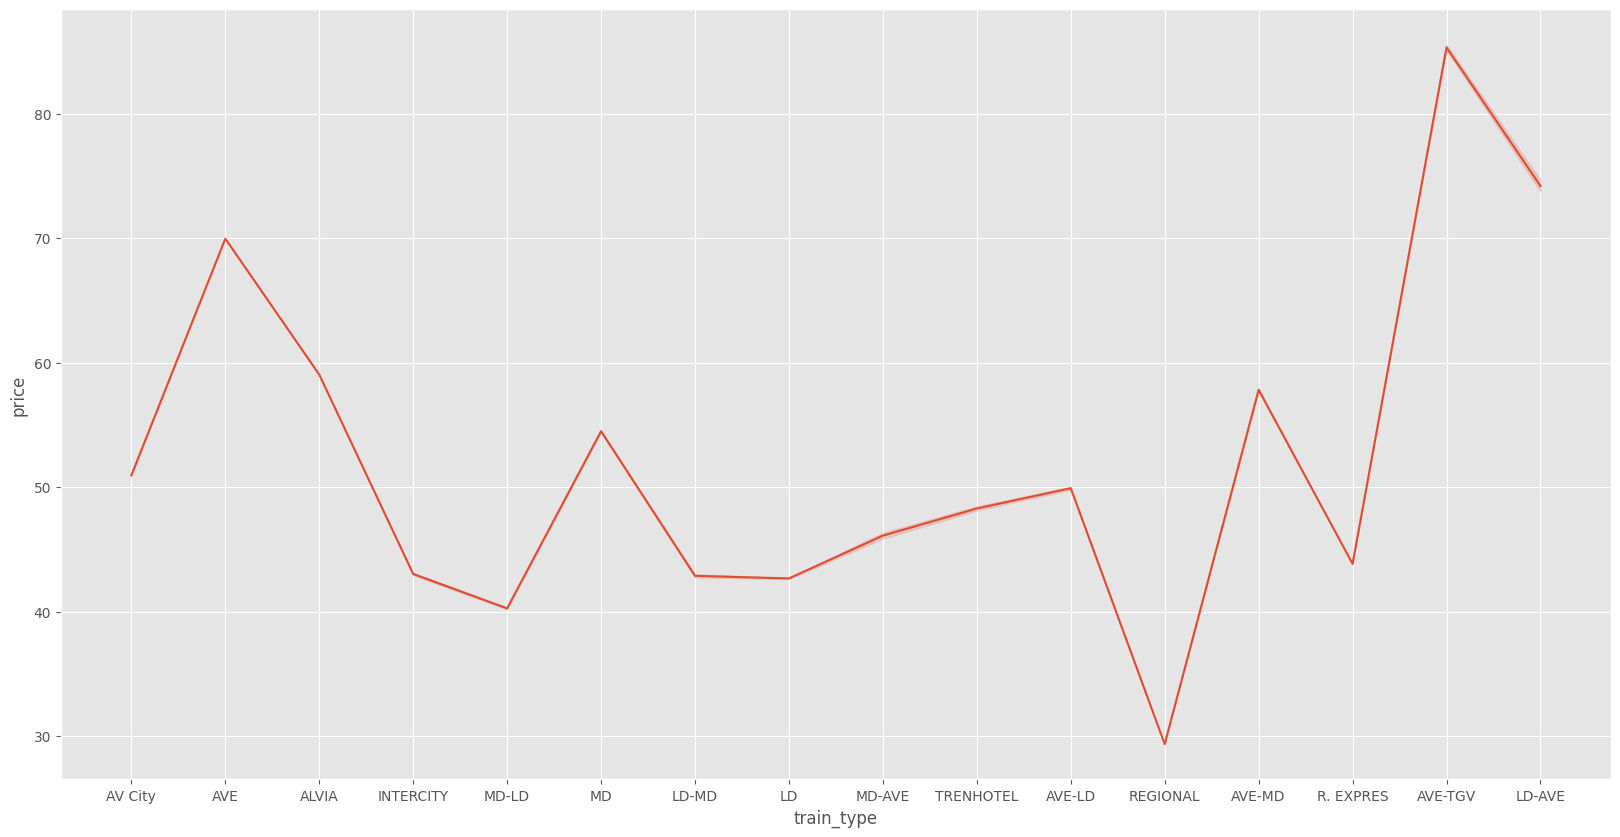

In [ ]:
# Y a-t-il une relation entre le type de train et le prix ?
plt.figure(figsize=(20,10))
sns.lineplot(data=df,x="train_type",y="price")

<Axes: xlabel='train_type', ylabel='Trip duration'>

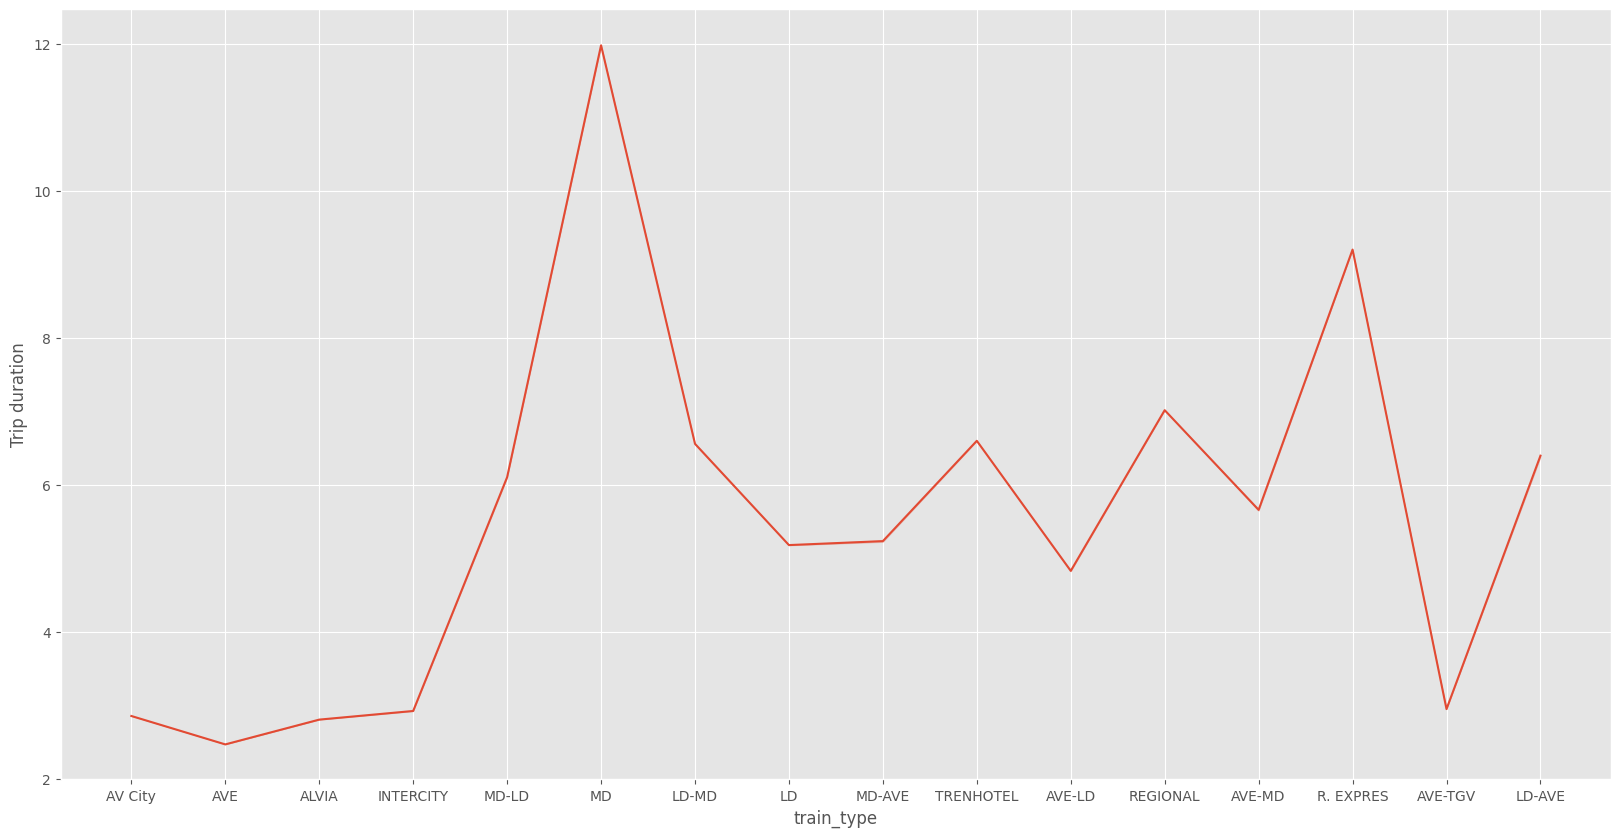

In [ ]:
# Y a-t-il une relation entre le type de train et la durée du trajet ?
plt.figure(figsize=(20,10))
sns.lineplot(data=df,x="train_type",y="Trip duration")

<function matplotlib.pyplot.show(close=None, block=None)>

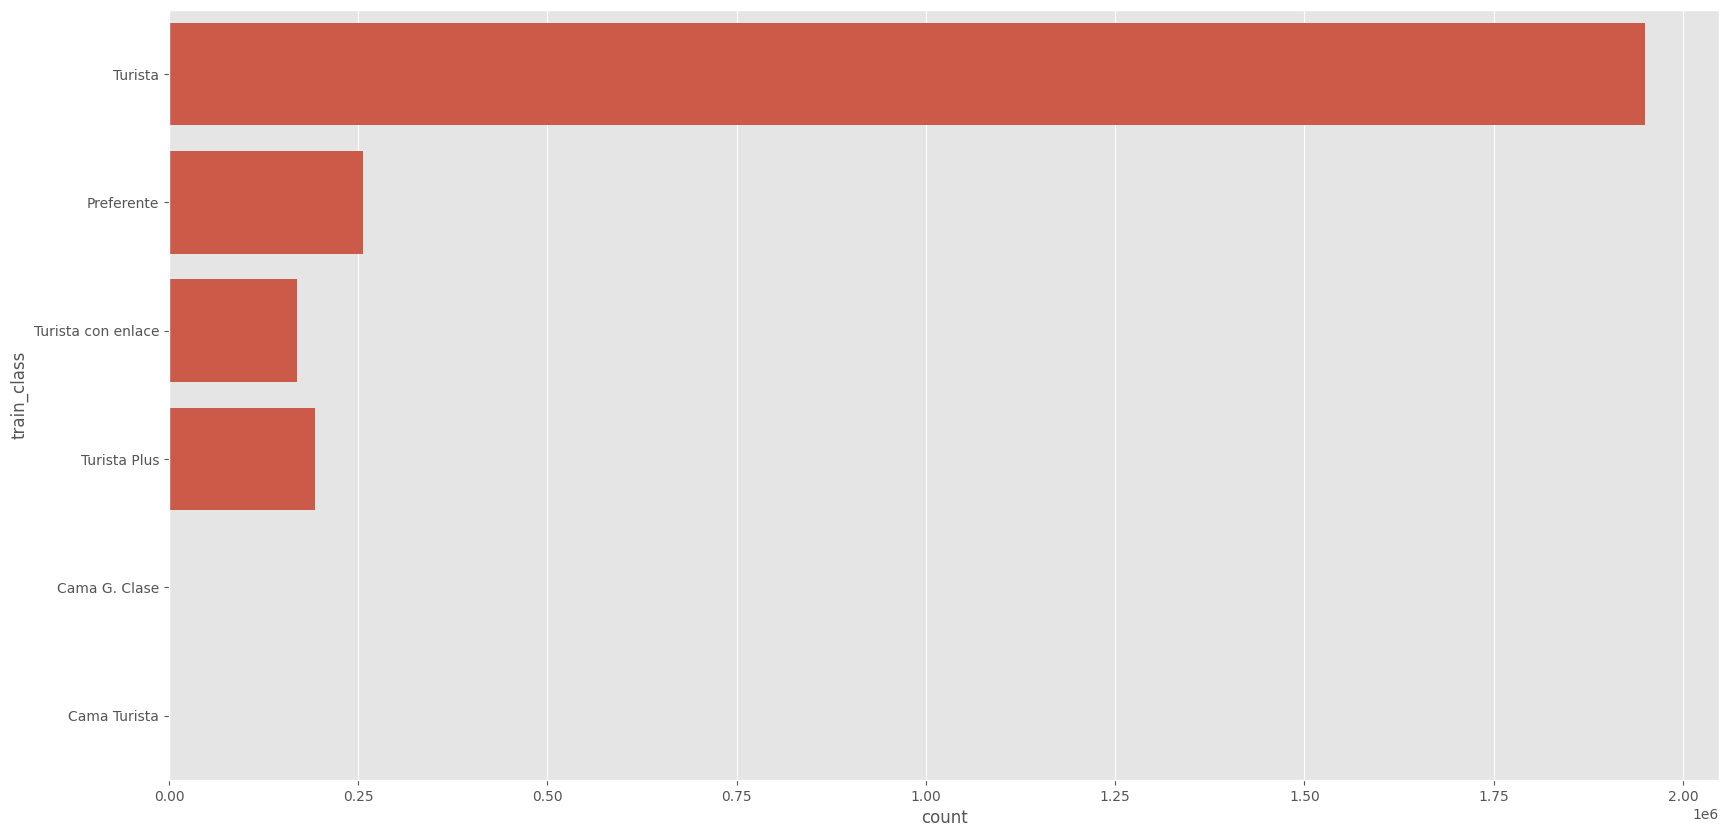

In [86]:
# La classe de train la plus populaire / la plus utilisée
plt.figure(figsize=(20,10))
sns.countplot(df['train_class'])
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

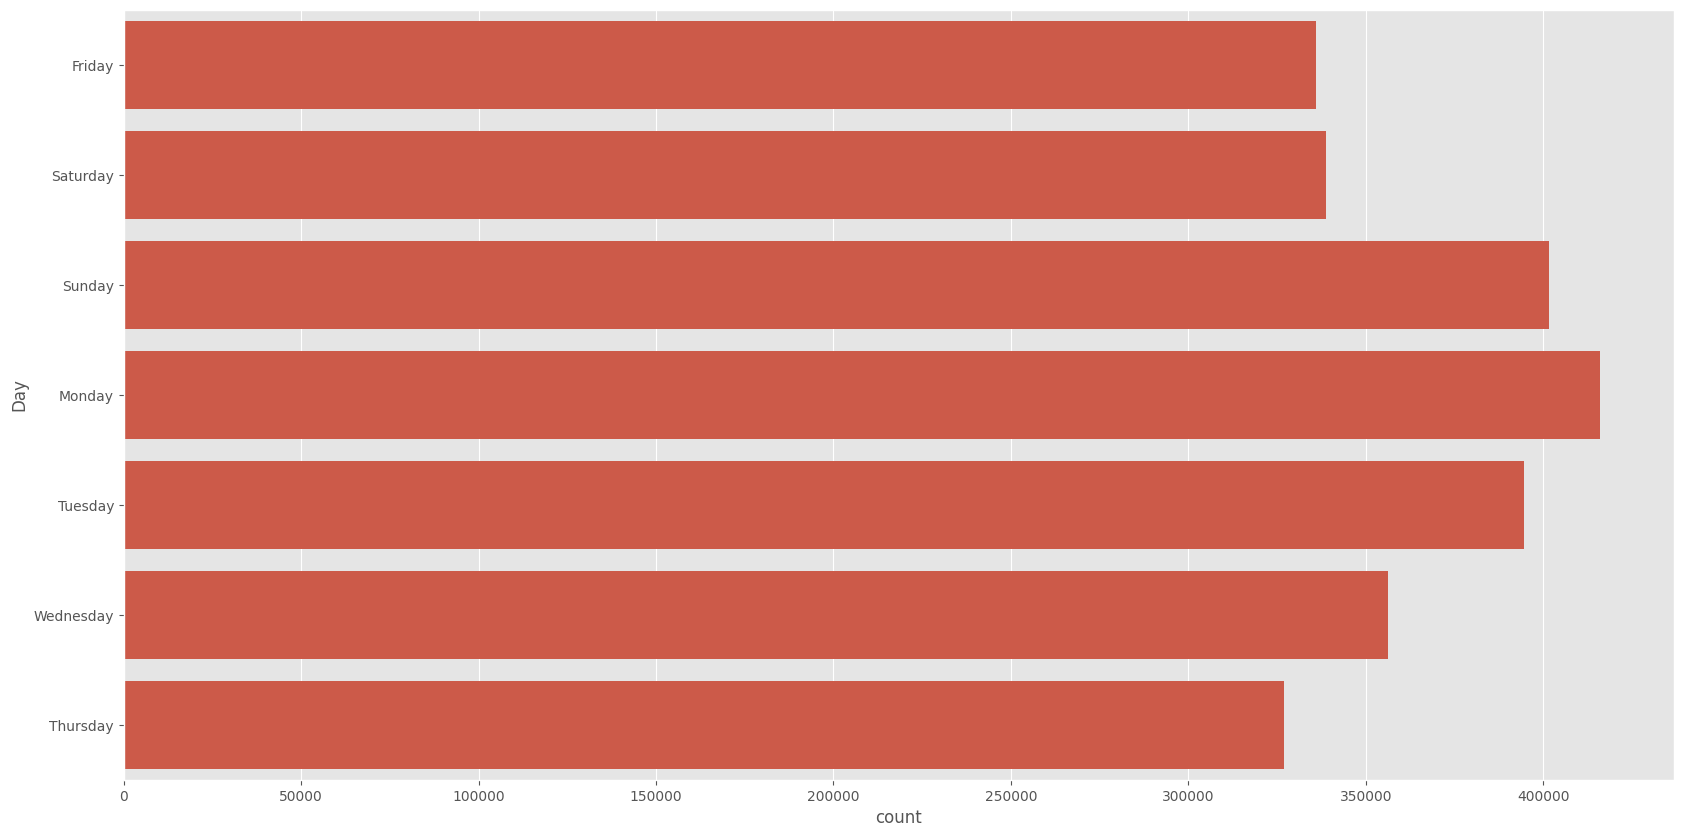

In [87]:
# Les jours les plus populaires où les gens utilisent davantage le train
plt.figure(figsize=(20,10))
sns.countplot(df['Day'])
plt.show

<Axes: xlabel='Trip duration', ylabel='price'>

/usr/local/lib/python3.11/dist-packages/IPython/core/events.py:89: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


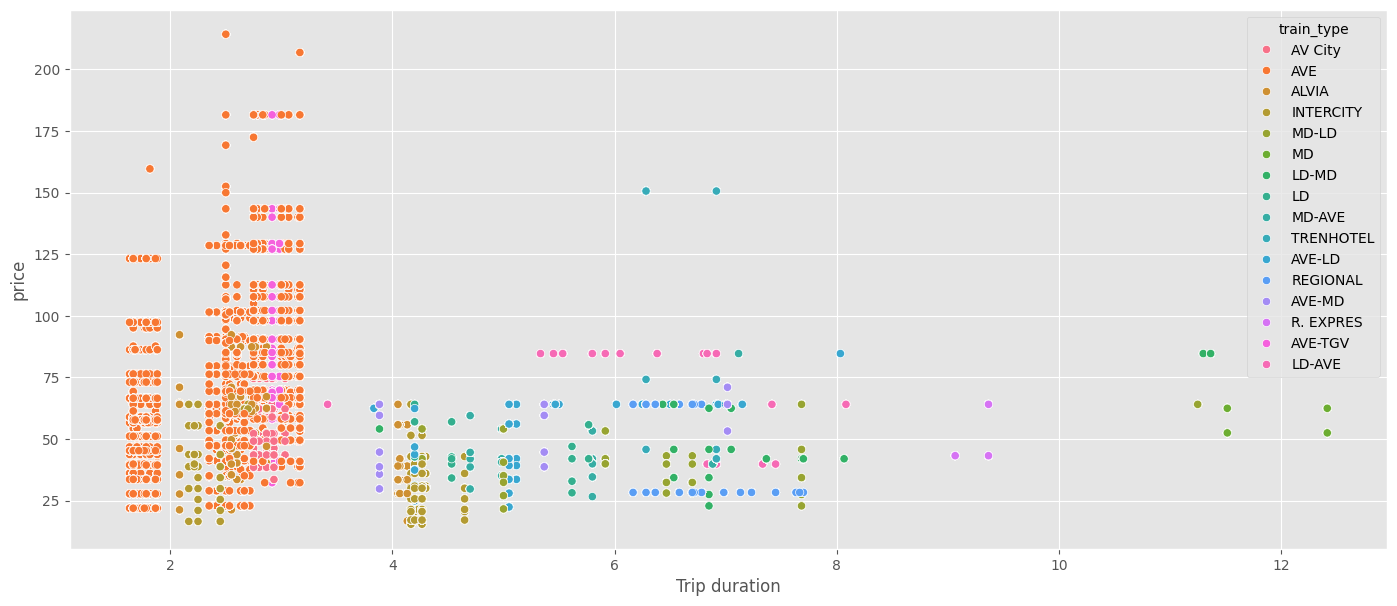

In [88]:
# Afficher un graphique sur la relation entre le temps et le prix
plt.figure(figsize=(17,7))
sns.scatterplot(data=df,x="Trip duration",y="price",hue="train_type")